
# Project: No show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    Data Set: A break down of No-Show appointments. A data set of 110,000 medical appointments in Brazil. The data is focused around whether or not the patient shows up for the appointment 
    
    Key information:
    Age: Of the patient
    Scholarship: indicated if the patient is ont he Brazilian welfare program.
    No-Show: did they show up for their appointment
    Sms received: did the patient get a sms message before the appointment 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal


<a id='wrangling'></a>
## Data Wrangling




### General Properties

Import and review the data 

In [62]:
appt_data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#review the data
print(appt_data)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946e+14        5636249      M  2016

In [63]:
appt_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Get a quick break down of the statistic of the data

In [64]:
#Get the statistical data 
appt_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Check for erros in column names

In [65]:
print(list(appt_data.columns.values)) #prints the colums names to check for spelling errors.

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


Age outliers 

In [66]:
print('Age:-> ',sorted(appt_data.Age.unique())) #checks for age errors

Age:->  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]




### Clean the data and check for further erros as cleaned

Correct column that are not named correctly 

In [67]:

appt_data.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
print(list(appt_data.columns.values))

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']


Check for errors in values and value types 

In [68]:
print('Age:-> ',sorted(appt_data.Age.unique()))
print('Gender:->',appt_data.Gender.unique())
print('Diabetes:-> ',appt_data.Diabetes.unique())
print('Alcoholism:-> ',appt_data.Alcoholism.unique())
print('Hypertension:-> ',appt_data.Hypertension.unique())#Hypertension
print('Handicap:-> ',appt_data.Handicap.unique())#Handicap
print('Scholarship:-> ',appt_data.Scholarship.unique())
print('SMS Received:-> ',appt_data.SMS_received.unique())
print('No Show:-> ',appt_data.No_show.unique())
print('Appointment Day:-> ',appt_data.AppointmentDay.unique())
print('Scheduled Day:-> ',appt_data.ScheduledDay.unique())

Age:->  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender:-> ['F' 'M']
Diabetes:->  [0 1]
Alcoholism:->  [0 1]
Hypertension:->  [1 0]
Handicap:->  [0 1 2 3 4]
Scholarship:->  [0 1]
SMS Received:->  [0 1]
No Show:->  ['No' 'Yes']
Appointment Day:->  ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-0

Appointment day and scheduled day can be date time format to make working with data easier.

In [69]:
appt_data.AppointmentDay=appt_data.AppointmentDay.apply(np.datetime64)
print('Appointment Day:-> ',appt_data.AppointmentDay.unique())

Appointment Day:->  ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-25T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-14T00:00:00.000000000' '2016-06-02T00:00:00.000000000'
 '2016-06-03T00:00:00.000000000' '2016-06-06T00:00:00.000000000'
 '2016-06-07T00:00:00.000000000' '2016-06-01T00:00:00.000000000'
 '2016-06-08T00:00:00.000000000']


In [70]:
appt_data.ScheduledDay=appt_data.ScheduledDay.apply(np.datetime64)
print('Scheduled Day:-> ',appt_data.ScheduledDay.unique())

Scheduled Day:->  ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ..., '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']


In [71]:
appt_data=appt_data[(appt_data.Age > 0) & (appt_data.Age < 96)]
print('Age:-> ',sorted(appt_data.Age.unique()))

Age:->  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


Make day of weeks so we can use that for later review

In [72]:
appt_data['WeekDay'] = pd.to_datetime(appt_data['AppointmentDay']).apply(lambda x: x.isoweekday())

In [73]:
print('WeekDay:-> ',appt_data.WeekDay.unique())

WeekDay:->  [5 2 1 3 4 6]


In [74]:
appt_data['No_show'].replace({'No':0,'Yes':1},inplace=True)

In [75]:
print(appt_data.No_show.unique())

[0 1]


<a id='eda'></a>
## Exploratory Data Analysis



### How does a text/SMS message change the percent of noshows? 

In [76]:
print(appt_data.SMS_received.sum())

34581


First how many people miss an appointment 

In [77]:
no_show_value= appt_data['No_show'].value_counts()
#print(no_show_value)#to test if pcount works
no_show_percent=no_show_value[1]/no_show_value.sum()
no_show_percent=no_show_percent*100
#print(no_show_percent)#to test if percent works
print('a total of ', no_show_value[1], ' people did not show for their appointment or', 
      round(no_show_percent,2),'%.')
show_app_perc=100-no_show_percent
print(round(show_app_perc,2), "% of people made it to their appointment.")



a total of  21673  people did not show for their appointment or 20.27 %.
79.73 % of people made it to their appointment.


12105 people did not get a text message and did not show up.
Where as 9568 people did get a text message and still did not show up.


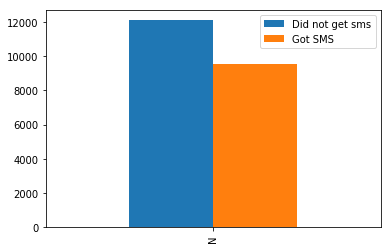

In [78]:
did_get_sms=appt_data.groupby('SMS_received')['No_show'].sum()
print(did_get_sms[0],'people did not get a text message and did not show up.')
print('Where as', did_get_sms[1], 'people did get a text message and still did not show up.')
#no_show_plot=did_get_sms.plot(kind='bar', columns=['Did not get sms','Got SMS'])
df=pd.DataFrame({'Did not get sms':did_get_sms[0],'Got SMS': did_get_sms[1]},index=['N'])
df.plot(kind='bar')



44.0 of people did get a sms message and did not show up
55.85  of people did not get a sms message and did not show up


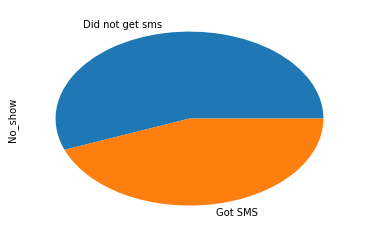

In [79]:
did_get_sms_no_show=did_get_sms[1]/did_get_sms.sum() *100
print(round(did_get_sms_no_show),"of people did get a sms message and did not show up")
didnt_get_sms_no_show=did_get_sms[0]/did_get_sms.sum() *100
print(round(didnt_get_sms_no_show,2)," of people did not get a sms message and did not show up")
percent_noshow_plot=did_get_sms.plot(kind='pie', labels=['Did not get sms','Got SMS'])

<a id='eda'></a>
## Conclusion:

There is a slight change in the numbers of no shows that get a sms message and those who do not. However the change is not significant in anyway. 

<a id='eda'></a>
## Does age affect howing up for scheduled appointments? 

Create a function to find the probability

In [80]:
def probability(dataset, group_by):    
    appt_data = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index() #No show data is set to binary 1 for true 0 for false
    appt_data['Probability'] = appt_data[0] / (appt_data[1] + appt_data[0])
    return appt_data[[group_by, 'Probability']]

Use probability function to see by scatter plot where the outliers are

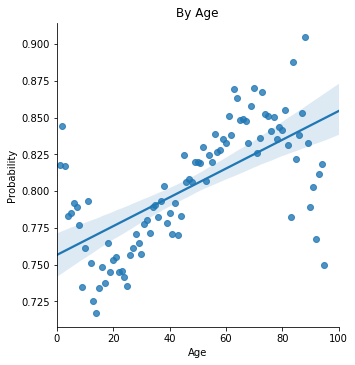

In [81]:
sns.lmplot(data = probability(appt_data, 'Age'), x = 'Age', y = 'Probability', fit_reg = True)
plt.xlim(0, 100)
plt.title('By Age')
plt.show()

<a id='conclusions'></a>
## Conclusions

> *While SMS messages do not seem to have much of an affect on the no show rate. Age has a large affect on it. It seems as a paitent gets older they tend to show up to their appointments more often. 

## Limitations 
    * Outliers in data
            Deleted ape greater than 0 and less then 96
            Further we are not sure of hte selection method of the data. As an example we are unsure of if the data in biased or unbiased, and if it is a random sample or not. 



In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0